# Introduction to TensorFlow 2


## Coding tutorials

#### [1. Hello TensorFlow!](#coding_tutorial_1)

<a id='coding_tutorial_1'></a>
## Hello TensorFlow!

In [1]:
import numpy as np

# Load MNIST dataset
print('Loading train data...\n')
data = np.loadtxt('./data/mnist.csv', delimiter=',')
print ('MNIST dataset loaded.\n')

x_train = data[:, 1:]
x_train = x_train / 255.
y_train = data[:, 0]

print('x train data size: {}'.format(x_train.shape))
print('y train data size: {}'.format(y_train.shape))

Loading train data...

MNIST dataset loaded.

x train data size: (60000, 784)
y train data size: (60000,)


In [3]:
# Import Tensorflow
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
# Check its version & devices
print(tf.__version__)
print(tf.config.list_physical_devices())

# Train a feedforward neural network for image classification
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=16, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

print('Training model...\n')
history = model.fit(x=x_train, y=y_train, validation_split=0.1,
    epochs=10, batch_size=32, verbose=0)
print('Model trained successfully')

2.14.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Training model...

Model trained successfully


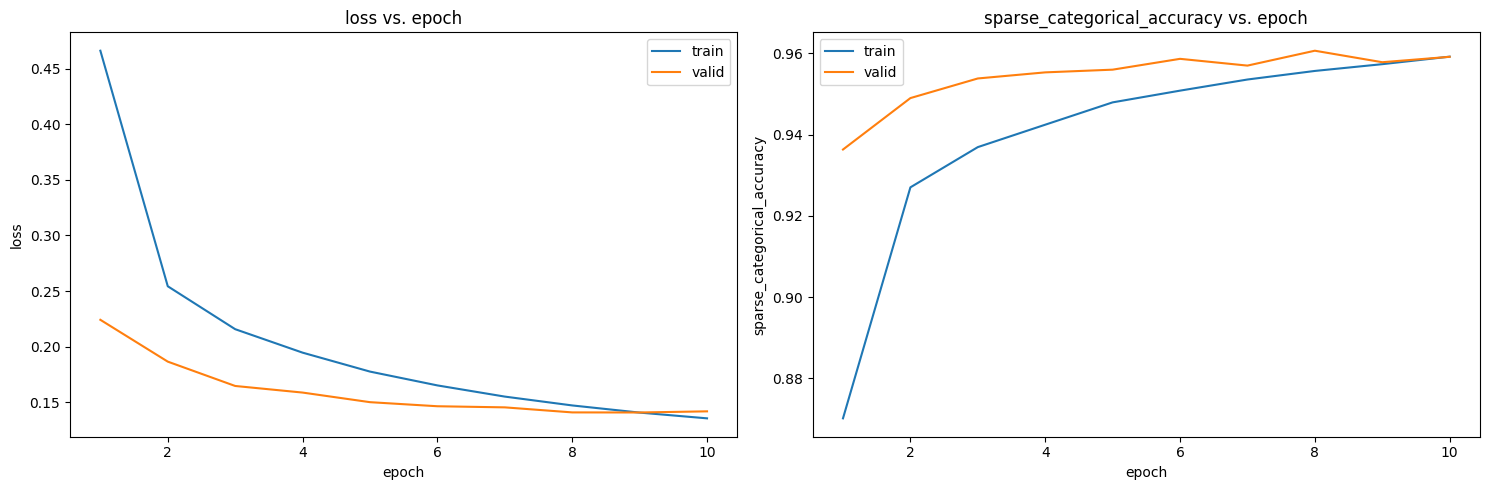

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df_history = pd.DataFrame(data=history.history, index=history.epoch)
metrics = ['loss', 'sparse_categorical_accuracy']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, metrics):
    sns.lineplot(ax=ax, data=df_history, label='train',
        x=df_history.index+1, y=metric)
    try:
        sns.lineplot(ax=ax, data=df_history, label='valid',
            x=df_history.index+1, y=f'val_{metric}')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel(xlabel='epoch')
    ax.set_ylabel(ylabel=f'{metric}')
    ax.set_title(label=f"{metric} vs. epoch")
fig.tight_layout()
plt.show()

In [5]:
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

x = tf.Variable([1., 2.], name='x')
print(x)

<tf.Variable 'x:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>
